In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Załadowanie danych CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja danych

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Budowa prostego modelu CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Kompilacja modelu
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Trening modelu
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3559 - loss: 1.7521 - val_accuracy: 0.5297 - val_loss: 1.3049
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5755 - loss: 1.1989 - val_accuracy: 0.6262 - val_loss: 1.0538
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6393 - loss: 1.0299 - val_accuracy: 0.6646 - val_loss: 0.9734
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6820 - loss: 0.8968 - val_accuracy: 0.6805 - val_loss: 0.9317
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7077 - loss: 0.8292 - val_accuracy: 0.6859 - val_loss: 0.9016
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7279 - loss: 0.7686 - val_accuracy: 0.6942 - val_loss: 0.8828
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7500 - loss: 0.7066 - val_accuracy: 0.7062 - val_loss: 0.8651
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7674 - loss: 0.6

In [5]:
# Funkcja do obliczania mapy saliency
def compute_saliency_map(model, image, class_index):
    image = tf.convert_to_tensor(image[np.newaxis, ...], dtype=tf.float32)  # Przekształcenie obrazu
    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image)
        class_score = predictions[:, class_index]

    gradients = tape.gradient(class_score, image)  # Obliczanie gradientów
    saliency_map = tf.abs(gradients[0])  # Wartości bezwzględne gradientów
    return saliency_map


In [19]:
# Wybór obrazu i etykiety z danych testowych
image_index = 535
image = x_test[image_index]
label = y_test[image_index][0]

In [20]:

# Obliczenie mapy saliency
saliency_map = compute_saliency_map(model, image, label)

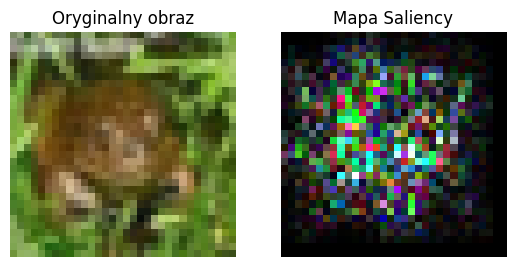

In [21]:
# Wizualizacja oryginalnego obrazu i mapy saliency
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image)
ax1.set_title("Oryginalny obraz")
ax1.axis('off')

ax2.imshow(saliency_map, cmap='hot')
ax2.set_title("Mapa Saliency")
ax2.axis('off')

plt.show()

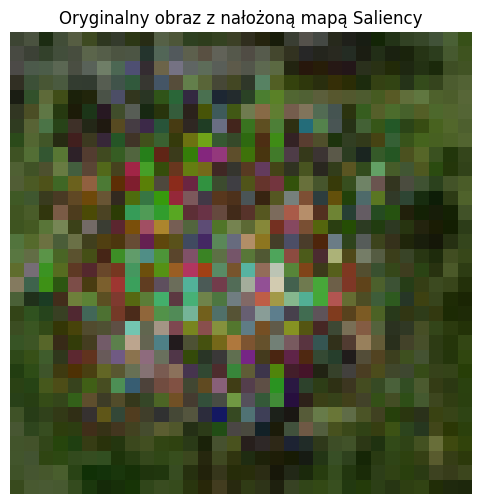

In [22]:
# Nałożenie mapy saliency na oryginalny obraz
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.imshow(saliency_map, cmap='hot', alpha=0.5)  # Nałożenie z przezroczystością
plt.title("Oryginalny obraz z nałożoną mapą Saliency")
plt.axis('off')
plt.show()